In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error
import urllib.request
from PIL import Image

In [14]:
df = pd.read_csv('streaming_sessions.csv')
df

,SessionID,UserID,StartTime,EndTime,Genre,DeviceType,SubscriptionType,Region,DurationMinutes,WatchMinutes,CompletionRate,BufferEvents,BitrateMbps,UserRating,PeakHours,PauseCount,VolumeChanges,AdSkips
0,SSN100000,USR2066,2024-04-07T04:51:26,2024-04-07T05:18:26,Sci-Fi,smartphone,Premium,India,29,26,1.00,2,2.55,4.2,No,1,6,0
1,SSN100001,USR7486,2024-11-26T03:02:59,2024-11-26T05:25:59,ANIMATION,Mobile,Standard,US,144,131,0.91,2,NaN,2.5,No,2,1,2
2,SSN100002,USR8158,2024-06-17T14:42:37,2024-06-17T16:05:37,documentary,Tablet,Premium,Germany,84,68,0.76,0,1.36,NaN,No,1,3,0
3,SSN100003,USR5693,2024-07-15T09:29:10,2024-07-15T11:53:10,Romance,PC,Basic,Brazil,141,85,0.61,1,4.94,3.7,No,0,1,0
4,SSN100004,USR4393,2024-08-21T10:37:18,2024-08-21T11:41:18,Horror,Tablet,basic,Brazil,64,37,0.58,1,2.68,4.3,No,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,SSN104195,USR1978,2024-07-13T15:19:57,2024-07-13T17:42:57,Drama,Game Console,Standard,Brazil,146,144,1.00,1,4.80,4.8,No,3,3,1
4196,SSN104196,USR6006,2024-05-16T10:49:55,2024-05-16T11:15:55,Drama,Tablet,Basic,Australia,29,16,NaN,0,1.96,3.9,No,2,2,1
4197,SSN104197,USR8144,2024-07-21T20:29:44,2024-07-21T21:09:44,Romance,Tablet,Basic,UK,42,27,0.62,0,3.13,NaN,Yes,0,2,0
4198,SSN104198,USR8072,2024-01-02T01:25:53,2024-01-02T03:25:53,Horror,Mobile,Basic,Canada,123,120,1.00,2,3.05,3.8,Yes,2,1,2


In [15]:
df_origin = df.copy()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SessionID         4200 non-null   object 
 1   UserID            4200 non-null   object 
 2   StartTime         4200 non-null   object 
 3   EndTime           4200 non-null   object 
 4   Genre             4200 non-null   object 
 5   DeviceType        4200 non-null   object 
 6   SubscriptionType  4200 non-null   object 
 7   Region            4200 non-null   object 
 8   DurationMinutes   4200 non-null   int64  
 9   WatchMinutes      4200 non-null   int64  
 10  CompletionRate    3990 non-null   float64
 11  BufferEvents      4200 non-null   int64  
 12  BitrateMbps       3990 non-null   float64
 13  UserRating        3990 non-null   float64
 14  PeakHours         4200 non-null   object 
 15  PauseCount        4200 non-null   int64  
 16  VolumeChanges     4200 non-null   int64  


# ערכים חסרים

In [17]:
df['PeakHours'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
df.isnull().sum()/len(df)*100

SessionID           0.0
UserID              0.0
StartTime           0.0
EndTime             0.0
Genre               0.0
DeviceType          0.0
SubscriptionType    0.0
Region              0.0
DurationMinutes     0.0
WatchMinutes        0.0
CompletionRate      5.0
BufferEvents        0.0
BitrateMbps         5.0
UserRating          5.0
PeakHours           0.0
PauseCount          0.0
VolumeChanges       0.0
AdSkips             0.0
dtype: float64

In [19]:
df['CompletionRate'].unique()

array([1.  , 0.91, 0.76, 0.61, 0.58, 0.96, 0.65, 0.69,  nan, 0.99, 0.89,
       0.68, 0.84, 0.86, 0.49, 0.62, 0.78, 0.51, 0.93, 0.41, 0.82, 0.83,
       0.71, 0.59, 0.5 , 0.72, 0.77, 0.97, 0.94, 0.85, 0.4 , 0.92, 0.64,
       0.75, 0.67, 0.27, 0.74, 0.6 , 0.88, 0.66, 0.9 , 0.95, 0.63, 0.81,
       0.87, 0.73, 0.8 , 0.7 , 0.33, 0.29, 0.98, 0.79, 0.56, 0.53, 0.38,
       0.55, 0.37, 0.57, 0.45, 0.34, 0.23, 0.52, 0.46, 0.26, 0.36, 0.42,
       0.48, 0.47, 0.39, 0.  , 0.35, 0.31, 0.54, 0.43, 0.32, 0.44, 0.25,
       0.3 , 0.11, 0.22, 0.19, 0.15, 0.17, 0.24, 0.28, 0.21, 0.12])

In [20]:
df['CompletionRate'] = df['CompletionRate'].astype(str).str.replace(r'\s+', ' ', regex=True)

In [21]:
df['CompletionRate'].unique()

array(['1.0', '0.91', '0.76', '0.61', '0.58', '0.96', '0.65', '0.69',
       'nan', '0.99', '0.89', '0.68', '0.84', '0.86', '0.49', '0.62',
       '0.78', '0.51', '0.93', '0.41', '0.82', '0.83', '0.71', '0.59',
       '0.5', '0.72', '0.77', '0.97', '0.94', '0.85', '0.4', '0.92',
       '0.64', '0.75', '0.67', '0.27', '0.74', '0.6', '0.88', '0.66',
       '0.9', '0.95', '0.63', '0.81', '0.87', '0.73', '0.8', '0.7',
       '0.33', '0.29', '0.98', '0.79', '0.56', '0.53', '0.38', '0.55',
       '0.37', '0.57', '0.45', '0.34', '0.23', '0.52', '0.46', '0.26',
       '0.36', '0.42', '0.48', '0.47', '0.39', '0.0', '0.35', '0.31',
       '0.54', '0.43', '0.32', '0.44', '0.25', '0.3', '0.11', '0.22',
       '0.19', '0.15', '0.17', '0.24', '0.28', '0.21', '0.12'],
      dtype=object)

In [22]:
df.isnull().sum()/len(df)*100

SessionID           0.0
UserID              0.0
StartTime           0.0
EndTime             0.0
Genre               0.0
DeviceType          0.0
SubscriptionType    0.0
Region              0.0
DurationMinutes     0.0
WatchMinutes        0.0
CompletionRate      0.0
BufferEvents        0.0
BitrateMbps         5.0
UserRating          5.0
PeakHours           0.0
PauseCount          0.0
VolumeChanges       0.0
AdSkips             0.0
dtype: float64

In [23]:
df['BitrateMbps'].unique()

array([2.55,  nan, 1.36, 4.94, 2.68, 4.83, 3.23, 3.48, 3.72, 5.05, 2.74,
       6.1 , 2.06, 3.37, 5.92, 2.37, 3.15, 3.13, 4.23, 4.74, 3.43, 3.71,
       4.3 , 3.81, 5.67, 1.44, 2.47, 3.29, 2.18, 2.91, 4.32, 4.57, 3.14,
       3.8 , 3.99, 4.4 , 4.78, 3.7 , 7.22, 4.09, 2.58, 2.07, 4.98, 4.99,
       3.5 , 3.59, 2.93, 3.1 , 5.4 , 5.97, 3.18, 4.28, 3.56, 3.21, 2.13,
       3.24, 5.26, 3.67, 5.19, 5.24, 3.65, 5.28, 3.86, 3.4 , 4.29, 3.79,
       2.78, 3.31, 4.7 , 4.9 , 3.76, 4.67, 5.7 , 2.66, 2.63, 2.17, 4.53,
       3.09, 4.12, 5.63, 3.52, 4.25, 2.41, 2.65, 5.39, 5.  , 4.01, 2.59,
       2.15, 3.02, 1.65, 4.46, 1.86, 3.44, 6.18, 4.49, 4.2 , 6.54, 3.83,
       4.86, 4.79, 4.21, 4.48, 5.04, 2.09, 5.32, 5.27, 4.42, 4.17, 3.58,
       4.06, 5.06, 3.66, 3.64, 2.46, 5.02, 5.22, 6.45, 5.53, 3.93, 4.14,
       3.03, 3.33, 4.44, 2.49, 2.3 , 1.63, 4.52, 2.92, 4.5 , 4.19, 4.15,
       2.54, 3.19, 1.42, 2.34, 2.67, 2.5 , 2.11, 6.01, 3.45, 3.96, 1.56,
       4.37, 5.66, 5.16, 3.68, 3.11, 3.9 , 4.91, 4.

In [24]:
df['BitrateMbps'] = df['BitrateMbps'].astype(str).str.replace(r'\s+', ' ', regex=True)

In [25]:
df.isnull().sum()/len(df)*100

SessionID           0.0
UserID              0.0
StartTime           0.0
EndTime             0.0
Genre               0.0
DeviceType          0.0
SubscriptionType    0.0
Region              0.0
DurationMinutes     0.0
WatchMinutes        0.0
CompletionRate      0.0
BufferEvents        0.0
BitrateMbps         0.0
UserRating          5.0
PeakHours           0.0
PauseCount          0.0
VolumeChanges       0.0
AdSkips             0.0
dtype: float64

In [26]:
df['UserRating'].unique()

array([4.2, 2.5, nan, 3.7, 4.3, 3.1, 4. , 3.2, 3.5, 5. , 4.7, 2. , 4.6,
       3.9, 3.8, 3. , 4.1, 3.6, 4.4, 4.8, 2.8, 4.9, 2.9, 4.5, 1.5, 2.3,
       2.7, 2.6, 1.9, 3.3, 2.1, 2.2, 3.4, 2.4, 1.7, 1.8, 1.6])

In [27]:
df['UserRating'] = df['UserRating'].astype(str).str.replace(r'\s+', ' ', regex=True)

In [28]:
df.isnull().sum()/len(df)*100

SessionID           0.0
UserID              0.0
StartTime           0.0
EndTime             0.0
Genre               0.0
DeviceType          0.0
SubscriptionType    0.0
Region              0.0
DurationMinutes     0.0
WatchMinutes        0.0
CompletionRate      0.0
BufferEvents        0.0
BitrateMbps         0.0
UserRating          0.0
PeakHours           0.0
PauseCount          0.0
VolumeChanges       0.0
AdSkips             0.0
dtype: float64

# תיקון שמות וצמצום שמות כפולים

In [29]:
df['Region'].unique()

array(['India', 'US', 'Germany', 'Brazil', 'Australia', 'Canada', 'UK',
       'France', 'AU', 'FR', 'usa', 'india', 'UK ', 'brazil', 'USA', 'Fr',
       'australia', 'au', 'United Kingdom', 'canada', 'DE', 'france',
       'CANADA', 'IN', 'BR', 'de', 'uk', 'us', 'in', 'germany', 'br'],
      dtype=object)

In [30]:
df['Region'] = df['Region'].str.title()

In [31]:
df['Region'].unique()

array(['India', 'Us', 'Germany', 'Brazil', 'Australia', 'Canada', 'Uk',
       'France', 'Au', 'Fr', 'Usa', 'Uk ', 'United Kingdom', 'De', 'In',
       'Br'], dtype=object)

In [32]:
df['Region'] = df['Region'].replace({
    'Us': 'Usa',
    'Fr': 'France',
    'Uk': 'United Kingdom',
    'Uk ': 'United Kingdom',
    'Au': 'Australia',
    'In': 'India',
    'Br': 'Brazil',
    'De': 'Germany',
})
df['Region'].unique()

array(['India', 'Usa', 'Germany', 'Brazil', 'Australia', 'Canada',
       'United Kingdom', 'France'], dtype=object)

# -------------------------------

In [33]:
df['SubscriptionType'].unique()

array(['Premium', 'Standard', 'Basic', 'basic', 'STD', 'STANDARD',
       'premium', 'PREMIUM', 'BASIC', 'standard'], dtype=object)

In [34]:
df['SubscriptionType'] = df['SubscriptionType'].str.title()

In [35]:
df['SubscriptionType'] = df['SubscriptionType'].replace({'std': 'Standard', 'Std': 'Standard'})

In [36]:
df['SubscriptionType'].unique()

array(['Premium', 'Standard', 'Basic'], dtype=object)

# -------------------------------

In [37]:
df['DeviceType'].unique()

array(['smartphone', 'Mobile', 'Tablet', 'PC', 'Smart TV', 'Game Console',
       'tablet', 'pc', 'smart tv', 'SmartTV', 'console', 'iPad',
       'GameConsole', 'SMART TV', 'GAME CONSOLE', 'TAB', 'PHONE',
       'desktop', 'Desktop', 'mobile'], dtype=object)

In [38]:
df['DeviceType'] = df['DeviceType'].str.title()
df['DeviceType'].unique()

array(['Smartphone', 'Mobile', 'Tablet', 'Pc', 'Smart Tv', 'Game Console',
       'Smarttv', 'Console', 'Ipad', 'Gameconsole', 'Tab', 'Phone',
       'Desktop'], dtype=object)

In [39]:
df['DeviceType'] = df['DeviceType'].replace({
    'Smarttv': 'Smart TV',
    'Smart Tv': 'Smart TV',
    'Smartphone': 'Phone',
    'Mobile': 'Phone',
    'Pc': 'Game Console',
    'Gameconsole': 'Game Console',
    'Console': 'Game Console',
    'Tab': 'Tablet'
})
df['DeviceType'].unique()

array(['Phone', 'Tablet', 'Game Console', 'Smart TV', 'Ipad', 'Desktop'],
      dtype=object)

# -------------------------------

In [40]:
df['Genre'].unique()

array(['Sci-Fi', 'ANIMATION', 'documentary', 'Romance', 'Horror',
       'Animation', 'Comedy', 'Drama', 'Action', 'animation',
       'Documentary', 'Horror ', 'Documentary ', 'Funny', 'SciFi',
       'science fiction', 'DRAMA', 'ACTION', 'Love', 'COMEDY', 'HORROR',
       'Drama ', 'ROMANCE', 'romance', 'sci-fi', 'action', 'Docu',
       'drama', 'Cartoon', 'horror', 'comedy'], dtype=object)

In [41]:
df['Genre'] = df['Genre'].str.title()
df['Genre'].unique()

array(['Sci-Fi', 'Animation', 'Documentary', 'Romance', 'Horror',
       'Comedy', 'Drama', 'Action', 'Horror ', 'Documentary ', 'Funny',
       'Scifi', 'Science Fiction', 'Love', 'Drama ', 'Docu', 'Cartoon'],
      dtype=object)

In [42]:
df['Genre'] = df['Genre'].replace({
    'Scifi': 'Science Fiction',
    'Sci-Fi': 'Science Fiction',
    'Docu': 'Documentary',
    'Documentary ': 'Documentary',
    'Love': 'Romance',
    'Horror ': 'Horror',
    'Funny': 'Comedy',
    'Drama ': 'Drama',
    'Funny': 'Comedy',
})
df['Genre'].unique()

array(['Science Fiction', 'Animation', 'Documentary', 'Romance', 'Horror',
       'Comedy', 'Drama', 'Action', 'Cartoon'], dtype=object)

# -------------------------------

In [43]:
df['StartTime'] = pd.to_datetime(df['StartTime'], errors='coerce')

In [44]:
df['StartDate'] = df['StartTime'].dt.date
df['StartTime'] = df['StartTime'].dt.time  #הוספה של עמודות זמן ותאריך התחלה
df

,SessionID,UserID,StartTime,EndTime,Genre,DeviceType,SubscriptionType,Region,DurationMinutes,WatchMinutes,CompletionRate,BufferEvents,BitrateMbps,UserRating,PeakHours,PauseCount,VolumeChanges,AdSkips,StartDate
0,SSN100000,USR2066,04:51:26,2024-04-07T05:18:26,Science Fiction,Phone,Premium,India,29,26,1.0,2,2.55,4.2,No,1,6,0,2024-04-07
1,SSN100001,USR7486,03:02:59,2024-11-26T05:25:59,Animation,Phone,Standard,Usa,144,131,0.91,2,nan,2.5,No,2,1,2,2024-11-26
2,SSN100002,USR8158,14:42:37,2024-06-17T16:05:37,Documentary,Tablet,Premium,Germany,84,68,0.76,0,1.36,nan,No,1,3,0,2024-06-17
3,SSN100003,USR5693,09:29:10,2024-07-15T11:53:10,Romance,Game Console,Basic,Brazil,141,85,0.61,1,4.94,3.7,No,0,1,0,2024-07-15
4,SSN100004,USR4393,10:37:18,2024-08-21T11:41:18,Horror,Tablet,Basic,Brazil,64,37,0.58,1,2.68,4.3,No,3,1,1,2024-08-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,SSN104195,USR1978,15:19:57,2024-07-13T17:42:57,Drama,Game Console,Standard,Brazil,146,144,1.0,1,4.8,4.8,No,3,3,1,2024-07-13
4196,SSN104196,USR6006,10:49:55,2024-05-16T11:15:55,Drama,Tablet,Basic,Australia,29,16,nan,0,1.96,3.9,No,2,2,1,2024-05-16
4197,SSN104197,USR8144,20:29:44,2024-07-21T21:09:44,Romance,Tablet,Basic,United Kingdom,42,27,0.62,0,3.13,nan,Yes,0,2,0,2024-07-21
4198,SSN104198,USR8072,01:25:53,2024-01-02T03:25:53,Horror,Phone,Basic,Canada,123,120,1.0,2,3.05,3.8,Yes,2,1,2,2024-01-02


In [45]:
df['EndTime'] = pd.to_datetime(df['EndTime'], errors='coerce')
df['EndDate'] = df['EndTime'].dt.date  
df['EndTime'] = df['EndTime'].dt.time   #הוספה של עמודות זמן ותאריך הסיום
df

,SessionID,UserID,StartTime,EndTime,Genre,DeviceType,SubscriptionType,Region,DurationMinutes,WatchMinutes,CompletionRate,BufferEvents,BitrateMbps,UserRating,PeakHours,PauseCount,VolumeChanges,AdSkips,StartDate,EndDate
0,SSN100000,USR2066,04:51:26,05:18:26,Science Fiction,Phone,Premium,India,29,26,1.0,2,2.55,4.2,No,1,6,0,2024-04-07,2024-04-07
1,SSN100001,USR7486,03:02:59,05:25:59,Animation,Phone,Standard,Usa,144,131,0.91,2,nan,2.5,No,2,1,2,2024-11-26,2024-11-26
2,SSN100002,USR8158,14:42:37,16:05:37,Documentary,Tablet,Premium,Germany,84,68,0.76,0,1.36,nan,No,1,3,0,2024-06-17,2024-06-17
3,SSN100003,USR5693,09:29:10,11:53:10,Romance,Game Console,Basic,Brazil,141,85,0.61,1,4.94,3.7,No,0,1,0,2024-07-15,2024-07-15
4,SSN100004,USR4393,10:37:18,11:41:18,Horror,Tablet,Basic,Brazil,64,37,0.58,1,2.68,4.3,No,3,1,1,2024-08-21,2024-08-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,SSN104195,USR1978,15:19:57,17:42:57,Drama,Game Console,Standard,Brazil,146,144,1.0,1,4.8,4.8,No,3,3,1,2024-07-13,2024-07-13
4196,SSN104196,USR6006,10:49:55,11:15:55,Drama,Tablet,Basic,Australia,29,16,nan,0,1.96,3.9,No,2,2,1,2024-05-16,2024-05-16
4197,SSN104197,USR8144,20:29:44,21:09:44,Romance,Tablet,Basic,United Kingdom,42,27,0.62,0,3.13,nan,Yes,0,2,0,2024-07-21,2024-07-21
4198,SSN104198,USR8072,01:25:53,03:25:53,Horror,Phone,Basic,Canada,123,120,1.0,2,3.05,3.8,Yes,2,1,2,2024-01-02,2024-01-02


In [46]:
df['CompletionRate'] = pd.to_numeric(df['CompletionRate'], errors='coerce')  #המרה ל-float

In [47]:
df['BitrateMbps'] = df['BitrateMbps'].str.replace('.', '', regex=False)
df['BitrateMbps'] = pd.to_numeric(df['BitrateMbps'], errors='coerce')
                                               
df['UserRating'] = pd.to_numeric(df['UserRating'], errors='coerce')         #המרת העמודות ל-float
df['BufferEvents'] = pd.to_numeric(df['BufferEvents'], errors='coerce')

In [48]:
from zoneinfo import ZoneInfo
import pandas as pd

# המרת עמודות StartDate ו-EndDate ל-datetime, נניח שהם ב-UTC
df['StartDateTime'] = pd.to_datetime(df['StartDate'], errors='coerce').dt.tz_localize('UTC')
df['EndDateTime'] = pd.to_datetime(df['EndDate'], errors='coerce').dt.tz_localize('UTC')

# מפת אזורי זמן לפי Region
region_to_timezone = {
    'India': 'Asia/Kolkata',
    'Usa': 'America/New_York',
    'Germany': 'Europe/Berlin',
    'Brazil': 'America/Sao_Paulo',
    'Australia': 'Australia/Sydney',
    'Canada': 'America/Toronto',
    'United Kingdom': 'Europe/London',              #כיוון השעות בכל מדינה לשעה המקומית שלה בעמודה נפרדת
    'France': 'Europe/Paris'
}

# יצירת עמודות עם הזמן המקומי (as datetime.datetime objects עם timezone)
df['LocalStartTime'] = df.apply(
    lambda row: row['StartDateTime'].astimezone(ZoneInfo(region_to_timezone.get(row['Region'], 'UTC'))),
    axis=1
)
df['LocalEndTime'] = df.apply(
    lambda row: row['EndDateTime'].astimezone(ZoneInfo(region_to_timezone.get(row['Region'], 'UTC'))),
    axis=1
)

# חילוץ השעה המקומית באמצעות apply
df['LocalStartHour'] = df['LocalStartTime'].apply(lambda x: x.hour if pd.notnull(x) else None)
df['LocalEndHour'] = df['LocalEndTime'].apply(lambda x: x.hour if pd.notnull(x) else None)


In [49]:
import pandas as pd

average_watch_time = df["WatchMinutes"].mean()
average_duration = df["DurationMinutes"].mean()
average_completion = df["CompletionRate"].mean()     

print(f"זמן צפייה ממוצע: {average_watch_time:.1f} דקות")
print(f"זמן כולל ממוצע (משך הסרט): {average_duration:.1f} דקות")
print(f"אחוז השלמה ממוצע: {average_completion * 100:.1f}%")

זמן צפייה ממוצע: 76.8 דקות
זמן כולל ממוצע (משך הסרט): 98.8 דקות
אחוז השלמה ממוצע: 77.9%


In [50]:
import pandas as pd

average_buffers = df["BufferEvents"].mean()
max_buffers = df["BufferEvents"].max()
min_buffers = df["BufferEvents"].min()

print(f"ממוצע בעיות טעינה לצפייה: {average_buffers:.2f}")
print(f"מספר טעינות מקסימלי בצפייה אחת: {max_buffers}")
print(f"מספר טעינות מינימלי בצפייה אחת: {min_buffers}")

ממוצע בעיות טעינה לצפייה: 1.15
מספר טעינות מקסימלי בצפייה אחת: 6
מספר טעינות מינימלי בצפייה אחת: 0


In [51]:
df['DeviceType'].unique()
df['DeviceType'].value_counts()

DeviceType
Game Console    1603
Tablet           865
Smart TV         853
Phone            848
Desktop           19
Ipad              12
Name: count, dtype: int64

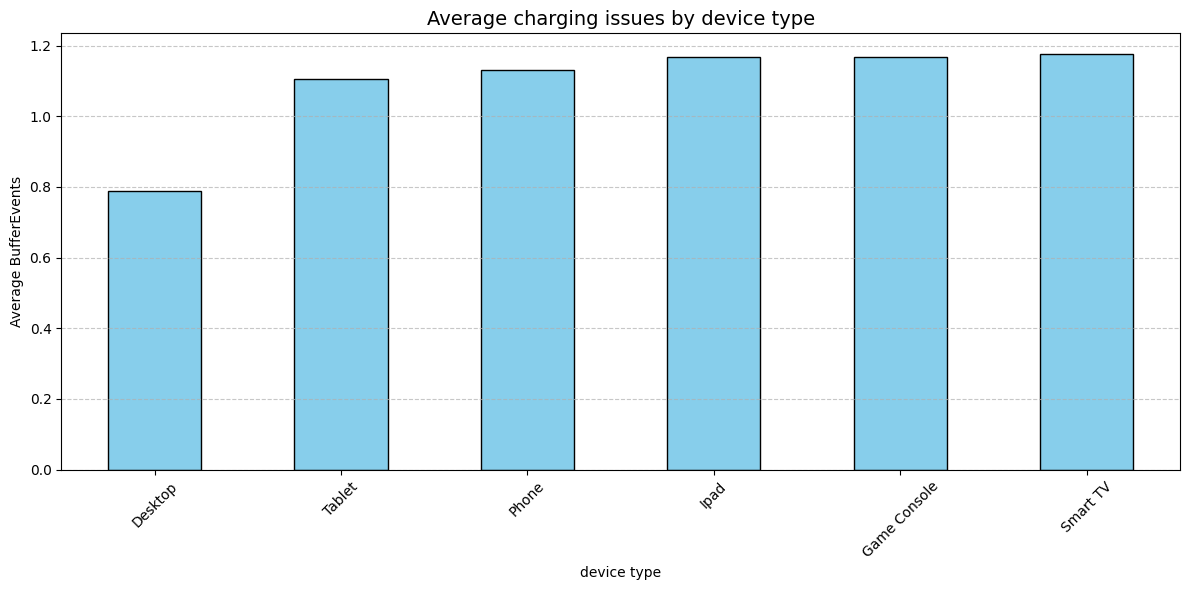

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# קיבוץ לפי סוג מכשיר וחישוב ממוצע בעיות טעינה
buffer_by_device = df.groupby("DeviceType")["BufferEvents"].mean().sort_values()

# ציור גרף עמודות
plt.figure(figsize=(12, 6))
buffer_by_device.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average charging issues by device type", fontsize=14)
plt.ylabel("Average BufferEvents")
plt.xlabel("device type")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [53]:
grouped_df = grouped = df.groupby(['Region', 'DeviceType']).agg(
    BufferEvents_mean=('BufferEvents', 'mean'),
    BitrateMbps_mean=('BitrateMbps', 'mean'),
    UserRating_mean=('UserRating', 'mean'),         #בדיקת איכות השידור לפי מכשיר בכל אזור
    DeviceCount=('DeviceType', 'count')    
).reset_index()      
grouped_df

,Region,DeviceType,BufferEvents_mean,BitrateMbps_mean,UserRating_mean,DeviceCount
0,Australia,Desktop,0.500000,391.500000,4.250000,2
1,Australia,Game Console,1.071066,322.113514,3.887113,197
2,Australia,Ipad,1.000000,378.000000,4.633333,3
3,Australia,Phone,1.152000,334.457627,3.949138,125
4,Australia,Smart TV,1.148936,427.977778,3.984783,94
5,Australia,Tablet,1.206522,316.302326,3.980460,92
6,Brazil,Desktop,0.666667,410.666667,4.266667,3
7,Brazil,Game Console,1.292079,297.397959,3.959896,202
8,Brazil,Ipad,1.000000,471.000000,2.000000,1
9,Brazil,Phone,1.028302,325.386139,3.950980,106


In [54]:
print(df['CompletionRate'].head(10))
print(df['CompletionRate'].dtype)

0    1.00
1    0.91
2    0.76
3    0.61
4    0.58
5    0.96
6    0.65
7    0.69
8     NaN
9    0.99
Name: CompletionRate, dtype: float64
float64


In [55]:
df['SubscriptionType'].value_counts()   #הדיקה כמה משתמשים יש מכל סוג מנוי

SubscriptionType
Basic       1645
Standard    1487
Premium     1068
Name: count, dtype: int64

In [56]:
df['DeviceType'].value_counts()   #בדיקה כמה משתמשים יש לכל סוג מכשיר

DeviceType
Game Console    1603
Tablet           865
Smart TV         853
Phone            848
Desktop           19
Ipad              12
Name: count, dtype: int64

In [57]:
df['Region'].value_counts()   #בדיקה כמה משתמשים יש לכל מדינה

Region
Brazil            558
Germany           550
United Kingdom    542
India             526
Usa               522
Australia         513
Canada            499
France            490
Name: count, dtype: int64

In [58]:
user_sessions = df.groupby('UserID').agg(SessionCount=('SessionID', 'nunique')).reset_index()
user_sessions

,UserID,SessionCount
0,USR1000,1
1,USR1004,1
2,USR1006,1
3,USR1007,2
4,USR1009,1
...,...,...
3319,USR9990,1
3320,USR9992,1
3321,USR9993,1
3322,USR9994,1


In [59]:
df.groupby(['Region', 'SubscriptionType']).agg(
    WatchMinutesMean=('WatchMinutes', 'mean'),
    CompletionRateMean=('CompletionRate', 'mean'),
    UniqueUsers=('UserID', 'nunique'),
    TotalCount=('UserID', 'count')  
).reset_index()

,Region,SubscriptionType,WatchMinutesMean,CompletionRateMean,UniqueUsers,TotalCount
0,Australia,Basic,75.090047,0.747463,209,211
1,Australia,Premium,85.451613,0.782672,123,124
2,Australia,Standard,78.561798,0.798503,177,178
3,Brazil,Basic,78.149038,0.769592,208,208
4,Brazil,Premium,85.447552,0.786985,142,143
5,Brazil,Standard,76.135266,0.786939,204,207
6,Canada,Basic,77.724868,0.784916,189,189
7,Canada,Premium,81.950000,0.801712,120,120
8,Canada,Standard,80.457895,0.784946,190,190
9,France,Basic,77.416216,0.776328,184,185


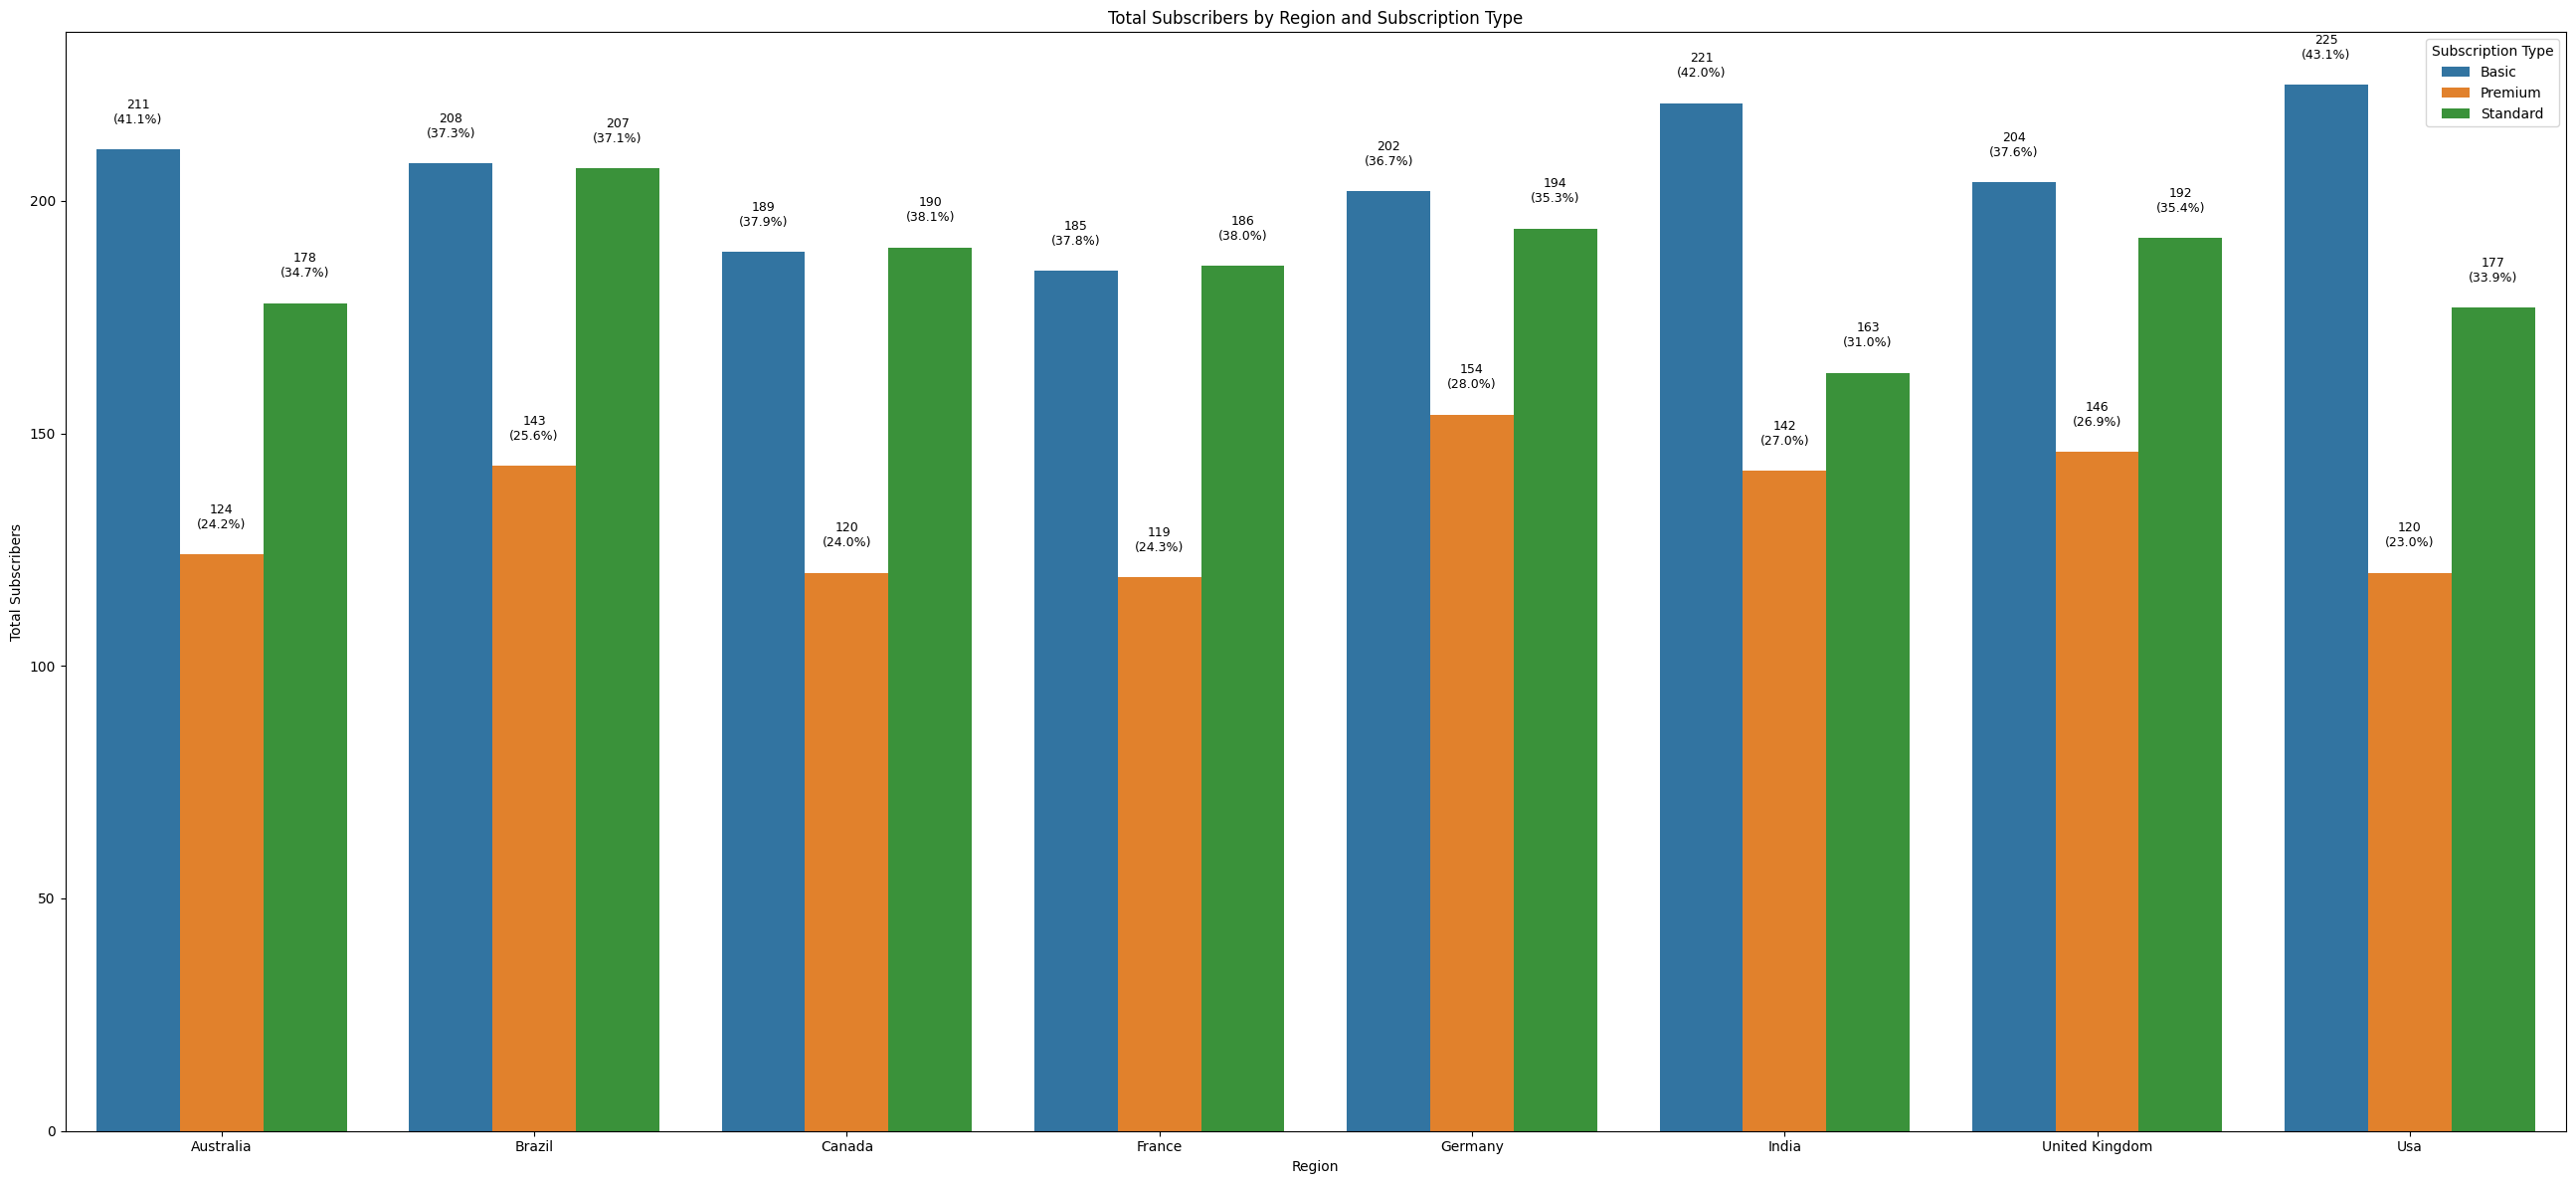

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# סופרים את מספר השורות (המנויים) לפי אזור וסוג מנוי
grouped_df = df.groupby(['Region', 'SubscriptionType']).size().reset_index(name='Count')

# חישוב אחוזים מתוך סך המנויים בכל אזור
grouped_df['Percentage'] = grouped_df.groupby('Region')['Count'].transform(lambda x: 100 * x / x.sum())

plt.figure(figsize=(26, 12))
barplot = sns.barplot(data=grouped_df, x='Region', y='Count', hue='SubscriptionType')

# הוספת טקסט מעל כל עמודה עם המספר ואחוז
for container, (_, sub_df) in zip(barplot.containers, grouped_df.groupby('SubscriptionType')):
    for bar, (_, row) in zip(container, sub_df.iterrows()):
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        text = f"{int(row['Count'])}\n({row['Percentage']:.1f}%)"
        barplot.text(x, height + 5, text, ha='center', va='bottom', fontsize=9)

plt.title('Total Subscribers by Region and Subscription Type')
plt.xlabel('Region')
plt.ylabel('Total Subscribers')
plt.legend(title='Subscription Type')
plt.tight_layout()
plt.show()


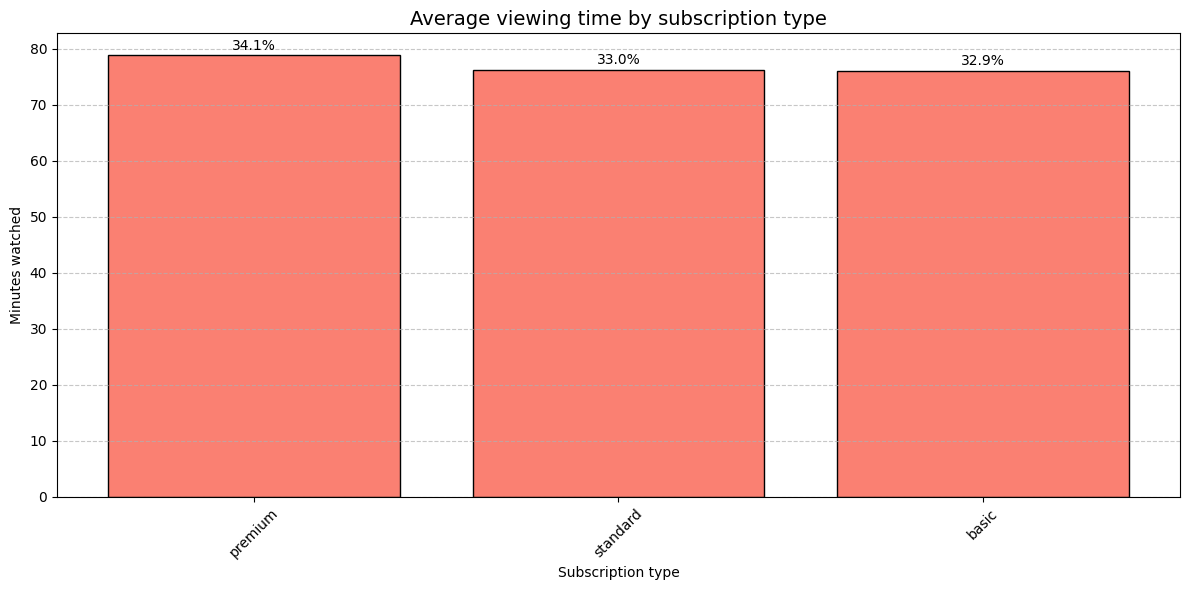

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# ניקוי שמות מנוי: אחידות באותיות קטנות
df["SubscriptionType_clean"] = df["SubscriptionType"].str.lower()

# חישוב ממוצעים לפי סוג מנוי לאחר ניקוי
comparison_clean = df.groupby("SubscriptionType_clean")[[
    "WatchMinutes", "CompletionRate", "BufferEvents", "BitrateMbps", "UserRating"
]].mean().sort_values("WatchMinutes", ascending=False)

# חישוב אחוזים מתוך סך כל זמן הצפייה הממוצע (לכל הסוגים ביחד)
total_watch = comparison_clean["WatchMinutes"].sum()
percentages = (comparison_clean["WatchMinutes"] / total_watch) * 100

# יצירת גרף עמודות - זמן צפייה ממוצע
plt.figure(figsize=(12, 6))
bars = plt.bar(comparison_clean.index, comparison_clean["WatchMinutes"], color="salmon", edgecolor="black")

plt.title("Average viewing time by subscription type", fontsize=14)
plt.ylabel("Minutes watched")
plt.xlabel("Subscription type")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# הוספת אחוזים מעל כל עמודה
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [116]:
newdf = df.groupby("UserID").agg('count')
newdf

,SessionID,StartTime,EndTime,Genre,DeviceType,SubscriptionType,Region,DurationMinutes,WatchMinutes,CompletionRate,...,EndDateTime,LocalStartTime,LocalEndTime,LocalStartHour,LocalEndHour,Cluster,SubscriptionType_clean,Genre_encoded,DeviceType_encoded,SubscriptionType_clean_encoded
UserID,,,,,,,,,,,,,,,,,,,,,
USR1000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
USR1004,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
USR1006,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
USR1007,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
USR1009,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USR9990,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
USR9992,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
USR9993,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


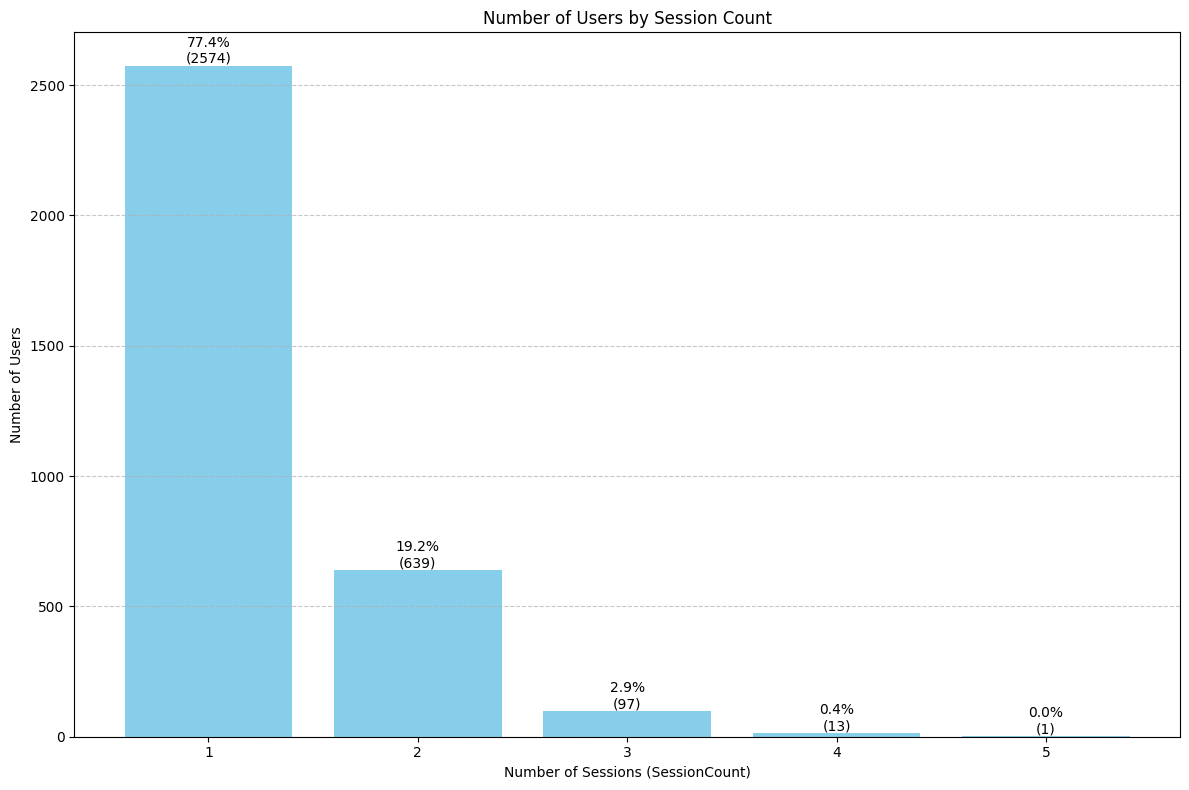

In [61]:
import matplotlib.pyplot as plt

# סינון משתמשים עם יותר מהתחברות אחת
multi_session_users = user_sessions[user_sessions['SessionCount'] >= 1]

# ספירת כמה משתמשים יש לפי כמות הכניסות
sessions_distribution = multi_session_users['SessionCount'].value_counts().sort_index()

# חישוב אחוזים מתוך סך המשתמשים עם יותר מכניסה אחת
total_users = sessions_distribution.sum()
percentages = (sessions_distribution / total_users) * 100

# ציור גרף בר עם כמות הכניסות בציר X ומספר המשתמשים בציר Y
plt.figure(figsize=(12, 8))
bars = plt.bar(sessions_distribution.index.astype(str), sessions_distribution.values, color='skyblue')

# הוספת אחוזים ומספר המשתמשים מעל כל עמודה
for bar, percent, count in zip(bars, percentages, sessions_distribution.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{percent:.1f}%\n({count})', ha='center', va='bottom', fontsize=10)

plt.title('Number of Users by Session Count')
plt.xlabel('Number of Sessions (SessionCount)')
plt.ylabel('Number of Users')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [62]:
grouped = df.groupby(['LocalStartHour', 'Region']).size().reset_index(name='SessionCount')
grouped

,LocalStartHour,Region,SessionCount
0,0,United Kingdom,221
1,1,France,205
2,1,Germany,234
3,1,United Kingdom,321
4,2,France,285
5,2,Germany,316
6,5,India,526
7,10,Australia,257
8,11,Australia,256
9,19,Canada,163


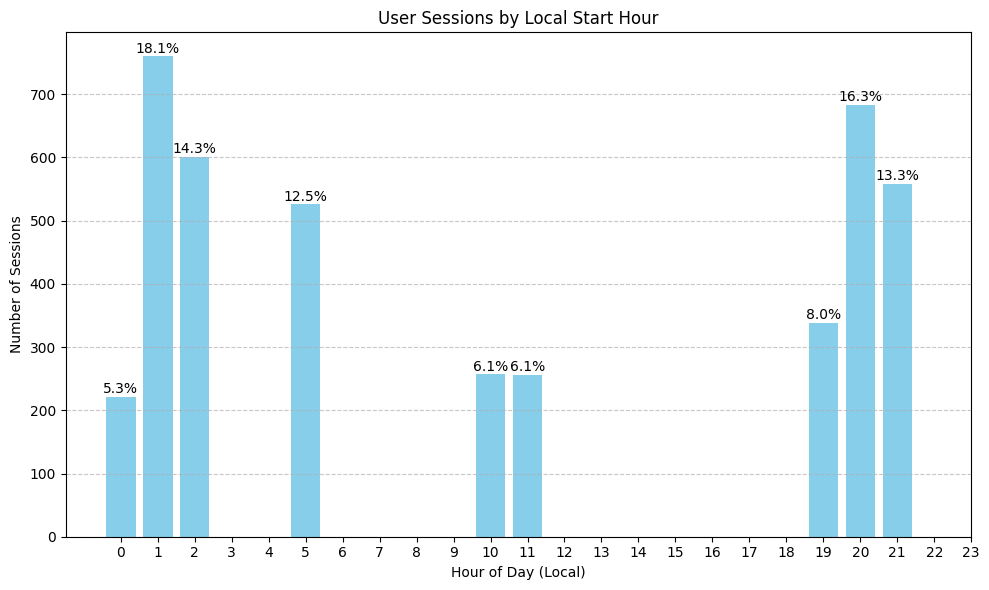

In [63]:
hour_counts = df['LocalStartHour'].value_counts().sort_index()

# חישוב אחוזים
total = hour_counts.sum()
percentages = (hour_counts / total * 100).round(1)

# גרף עמודות
plt.figure(figsize=(10, 6))
bars = plt.bar(hour_counts.index, hour_counts.values, color='skyblue')

# הוספת אחוזים מעל כל עמודה
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{pct}%', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Hour of Day (Local)')
plt.ylabel('Number of Sessions')
plt.title('User Sessions by Local Start Hour')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

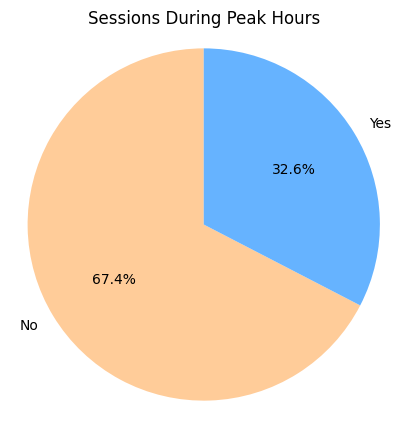

In [64]:
peak_counts = df['PeakHours'].value_counts()

colors = ['#ffcc99', '#66b3ff']     #בדיקה כמה אחוז מחוברים יש בשעות העומס
plt.figure(figsize=(5, 5))
plt.pie(peak_counts, labels=peak_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Sessions During Peak Hours')
plt.axis('equal')
plt.show()

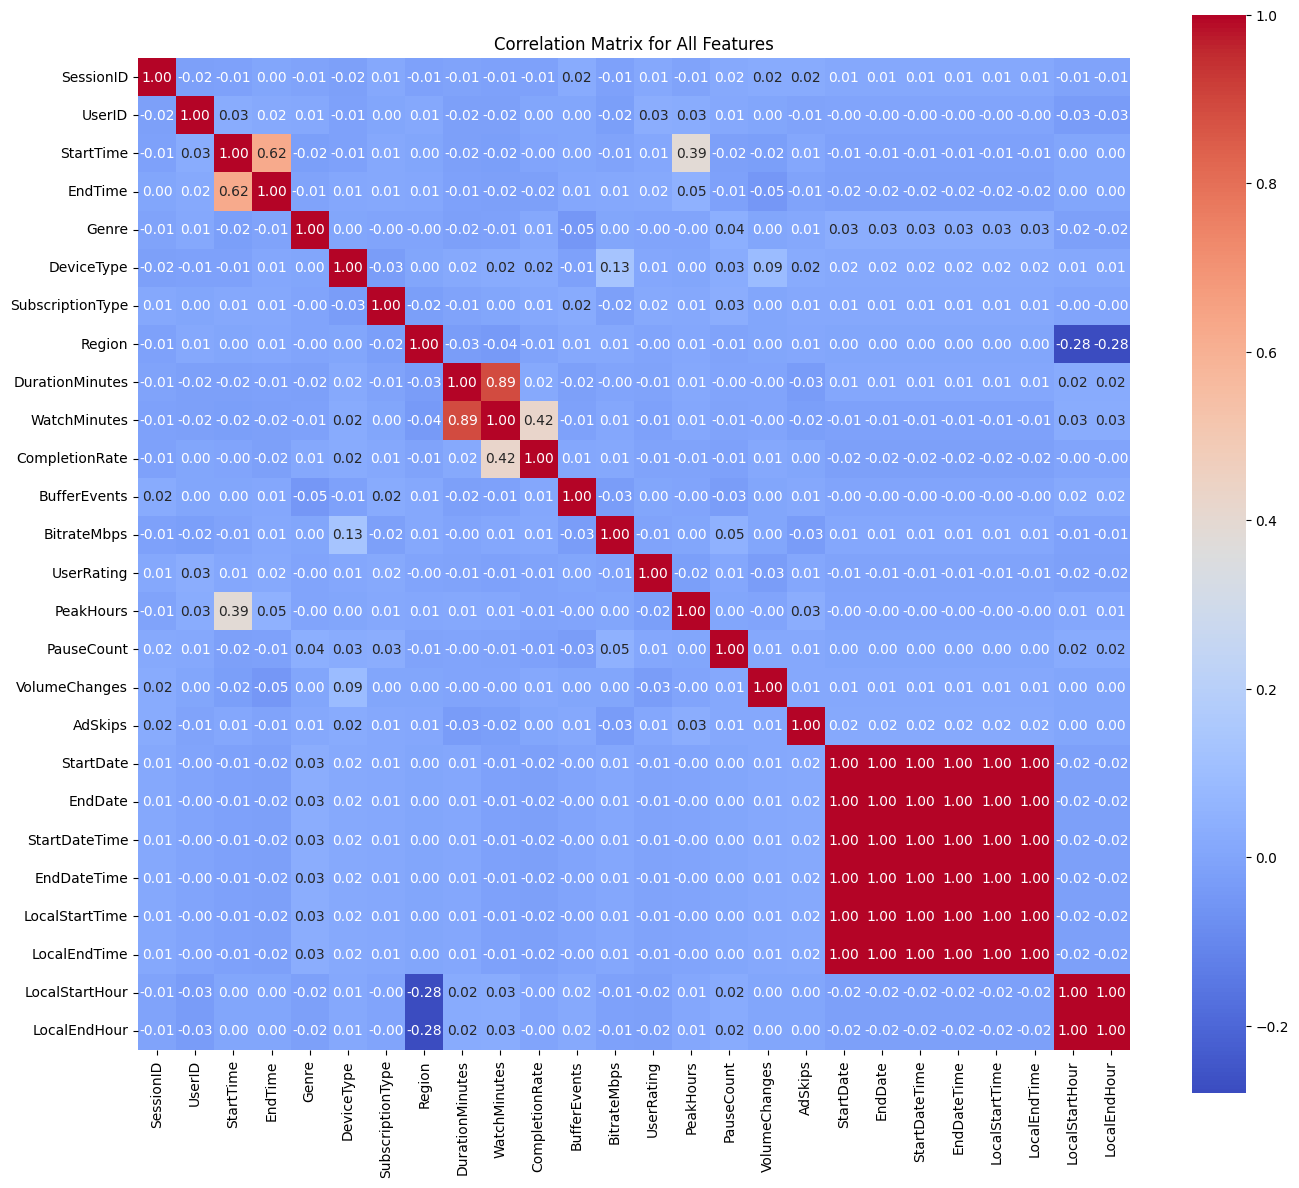

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# עותק מה-DataFrame המקורי
df_copy = df.copy()

# המרת עמודות קטגוריאליות למספרים
for col in df_copy.select_dtypes(include='object').columns:
    df_copy[col] = df_copy[col].astype('category').cat.codes

# המרת עמודות datetime (אם קיימות) למספרים - זמן ב-epoch בשניות
for col in df_copy.select_dtypes(include=['datetime64[ns]', 'datetime64']).columns:
    df_copy[col] = df_copy[col].astype('int64') // 10**9  # המרת ננוסניות לשניות

# חישוב מטריצת הקורלציה
correlation_matrix = df_copy.corr()

# הדמיית מטריצת הקורלציה
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix for All Features')
plt.show()

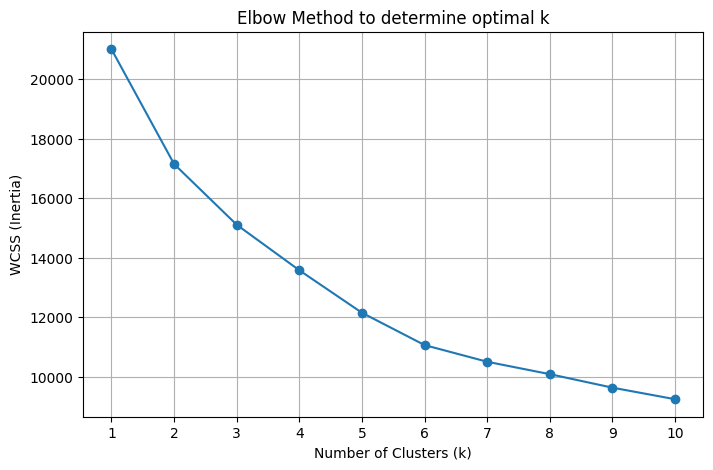

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# עמודות שנשתמש בהן
features = ['WatchMinutes', 'CompletionRate', 'BufferEvents', 'BitrateMbps', 'UserRating']

# שלב 1: סינון העמודות הרצויות
df_cluster = df[features].copy()

# שלב 2: המרת CompletionRate לאחוזים אם נדרש
# אם CompletionRate הוא אובייקט, ננקה ממנו סימני אחוז ונמיר למספר
if df_cluster['CompletionRate'].dtype == 'object':
    df_cluster['CompletionRate'] = df_cluster['CompletionRate'].str.replace('%', '').astype(float)

# שלב 3: מילוי ערכים חסרים בממוצע
imputer = SimpleImputer(strategy='mean')
df_cluster_imputed = imputer.fit_transform(df_cluster)

# שלב 4: נורמליזציה
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster_imputed)

# שלב 5: Elbow Method - בדיקת טווחים של k
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # מדד WCSS - סך המרחקים בתוך כל קלאסטר

# שלב 6: ציור הגרף
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method to determine optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [111]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = clusters

print(f"\n Created {k} clusters!")


 Created 4 clusters!


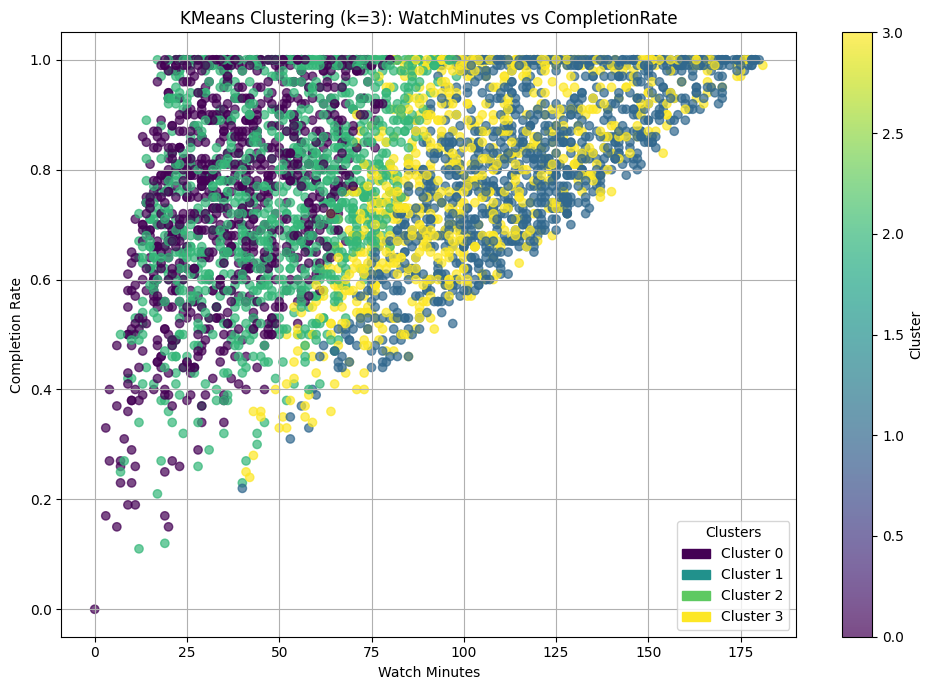

In [113]:
import matplotlib.patches as mpatches

# מיפוי צבעים ידני לפי קלאסטר
colors = ['#440154', '#21918c', '#5ec962', '#fde725']  # צבעים מ-viridis
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(4)]

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    df['WatchMinutes'],
    df['CompletionRate'],
    c=df['Cluster'],
    cmap='viridis',
    alpha=0.7
)

plt.xlabel('Watch Minutes')
plt.ylabel('Completion Rate')
plt.title('KMeans Clustering (k=3): WatchMinutes vs CompletionRate')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')

# מקרא צבעים
plt.legend(handles=patches, title='Clusters')
plt.tight_layout()
plt.show()


In [69]:
cluster_summary = df.groupby('Cluster')[['WatchMinutes', 'CompletionRate', 'BufferEvents', 'BitrateMbps', 'UserRating']].mean().round(1)
print("\n📊 Cluster Characteristics (Averages):")
print(cluster_summary)

# Count customers in each cluster
print("\n👥 Number of customers per cluster:")
print(df['Cluster'].value_counts().sort_index())



📊 Cluster Characteristics (Averages):
         WatchMinutes  CompletionRate  BufferEvents  BitrateMbps  UserRating
Cluster                                                                     
0                67.5             0.8           2.6        319.2         4.1
1               109.0             0.9           1.0        393.4         3.3
2                86.1             0.9           0.6        308.7         4.5
3                44.0             0.6           0.7        356.0         3.8

👥 Number of customers per cluster:
Cluster
0     859
1    1050
2    1173
3    1118
Name: count, dtype: int64


In [115]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 1. בחירת עמודות למידת מכונה
features = ['WatchMinutes', 'DurationMinutes', 'UserRating']

# 2. יצירת DataFrame עם העמודות שנבחרו
df_ml = df[features].copy()

# 3. טיפול בערכים חסרים - מילוי ממוצע
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df_ml)

# 4. נרמול הנתונים
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 5. בחירת אלגוריתם - KMeans עם 4 קלאסטרים לדוגמה
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 6. הוספת תוויות הקלאסטרים ל-DataFrame המקורי
df['Cluster'] = clusters

# 7. הצגת תוצאה
print(df[['WatchMinutes', 'DurationMinutes', 'UserRating', 'Cluster']].head())


   WatchMinutes  DurationMinutes  UserRating  Cluster
0            26               29         4.2        2
1           131              144         2.5        3
2            68               84         NaN        2
3            85              141         3.7        3
4            37               64         4.3        2


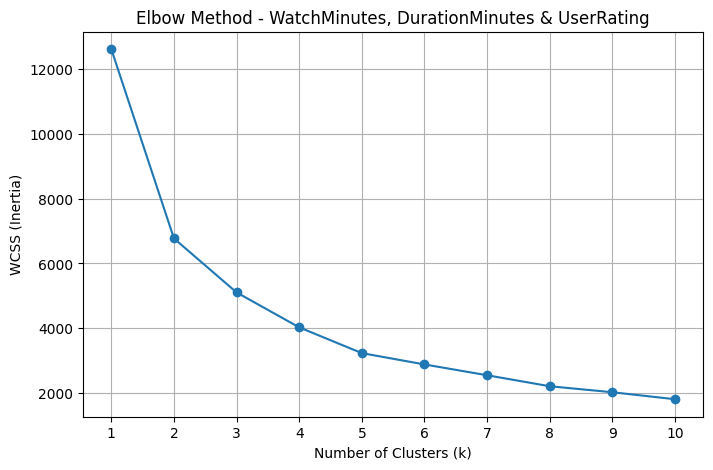

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# עמודות לקלאסטרינג
features = ['WatchMinutes', 'DurationMinutes', 'UserRating']

# שלב 1: סינון העמודות הרצויות
df_cluster = df[features].copy()

# שלב 2: מילוי ערכים חסרים בממוצע
imputer = SimpleImputer(strategy='mean')
df_cluster_imputed = imputer.fit_transform(df_cluster)

# שלב 3: נרמול (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster_imputed)

# שלב 4: Elbow Method - בדיקת טווח k מ-1 עד 10
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# שלב 5: גרף Elbow להצגת התוצאה
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method - WatchMinutes, DurationMinutes & UserRating')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [83]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = clusters

print(f"\n Created {k} clusters!")


 Created 4 clusters!


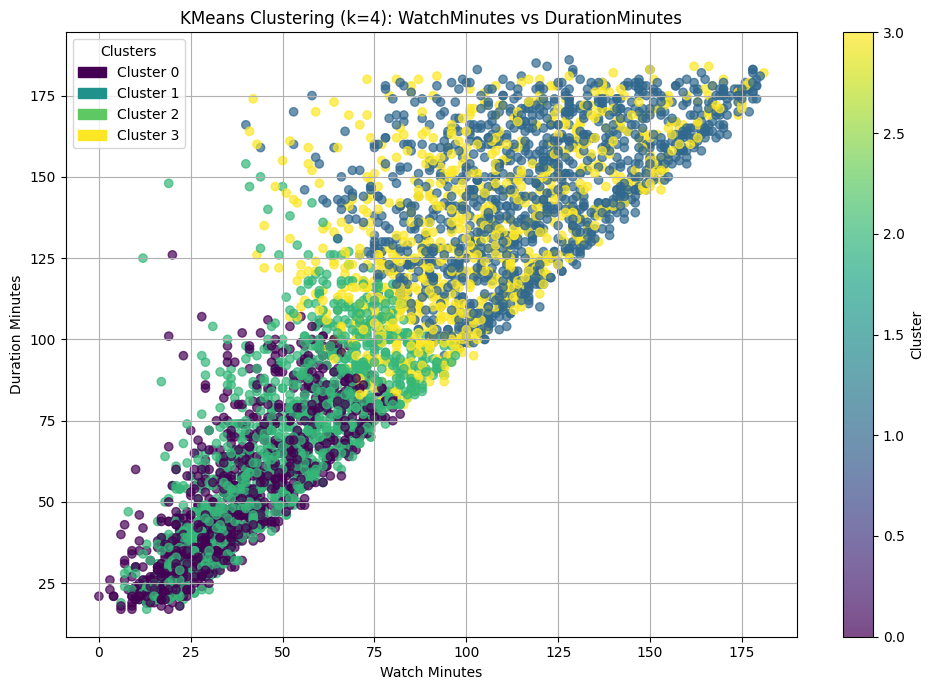

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# עמודות לקלאסטרינג
features = ['WatchMinutes', 'DurationMinutes', 'UserRating']
df_cluster = df[features].copy()

# טיפול בערכים חסרים ומילוי בממוצע
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df_cluster)

# נרמול הנתונים
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# הרצת KMeans עם 4 קלאסטרים
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# הוספת עמודת Cluster לדאטהפריים המקורי
df['Cluster'] = clusters

# צבעים ותגיות עבור הקלאסטרים
colors = ['#440154', '#21918c', '#5ec962', '#fde725']
labels = [f'Cluster {i}' for i in range(k)]
patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(k)]

# ציור גרף פיזור
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    df['WatchMinutes'],
    df['DurationMinutes'],
    c=df['Cluster'],
    cmap='viridis',
    alpha=0.7
)

plt.xlabel('Watch Minutes')
plt.ylabel('Duration Minutes')
plt.title(f'KMeans Clustering (k={k}): WatchMinutes vs DurationMinutes')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.legend(handles=patches, title='Clusters')
plt.tight_layout()
plt.show()


In [114]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# --- 1. בחירת עמודות למידת מכונה (מספריות) ---
features = ['DurationMinutes', 'WatchMinutes']  # תוכל להוסיף עמודות נוספות רלוונטיות

# --- 2. יצירת עותק עם העמודות שנבחרו ---
df_ml = df[features].copy()

# --- 3. טיפול בערכים חסרים: מילוי בממוצע ---
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df_ml)

# --- 4. נרמול נתונים (חשוב לקלאסטרינג) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# --- 5. הרצת KMeans עם k=4 (למשל) ---
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# --- 6. הוספת תוויות הקלאסטרים ל-DataFrame המקורי ---
df['Cluster'] = clusters

# --- 7. הדפסת דוגמה של התוצאה ---
print(df[['DurationMinutes', 'WatchMinutes', 'Cluster']].head())


   DurationMinutes  WatchMinutes  Cluster
0               29            26        0
1              144           131        1
2               84            68        2
3              141            85        3
4               64            37        0


In [71]:
df

,SessionID,UserID,StartTime,EndTime,Genre,DeviceType,SubscriptionType,Region,DurationMinutes,WatchMinutes,...,StartDate,EndDate,StartDateTime,EndDateTime,LocalStartTime,LocalEndTime,LocalStartHour,LocalEndHour,Cluster,SubscriptionType_clean
0,SSN100000,USR2066,04:51:26,05:18:26,Science Fiction,Phone,Premium,India,29,26,...,2024-04-07,2024-04-07,2024-04-07 00:00:00+00:00,2024-04-07 00:00:00+00:00,2024-04-07 05:30:00+05:30,2024-04-07 05:30:00+05:30,5,5,0,premium
1,SSN100001,USR7486,03:02:59,05:25:59,Animation,Phone,Standard,Usa,144,131,...,2024-11-26,2024-11-26,2024-11-26 00:00:00+00:00,2024-11-26 00:00:00+00:00,2024-11-25 19:00:00-05:00,2024-11-25 19:00:00-05:00,19,19,1,standard
2,SSN100002,USR8158,14:42:37,16:05:37,Documentary,Tablet,Premium,Germany,84,68,...,2024-06-17,2024-06-17,2024-06-17 00:00:00+00:00,2024-06-17 00:00:00+00:00,2024-06-17 02:00:00+02:00,2024-06-17 02:00:00+02:00,2,2,2,premium
3,SSN100003,USR5693,09:29:10,11:53:10,Romance,Game Console,Basic,Brazil,141,85,...,2024-07-15,2024-07-15,2024-07-15 00:00:00+00:00,2024-07-15 00:00:00+00:00,2024-07-14 21:00:00-03:00,2024-07-14 21:00:00-03:00,21,21,3,basic
4,SSN100004,USR4393,10:37:18,11:41:18,Horror,Tablet,Basic,Brazil,64,37,...,2024-08-21,2024-08-21,2024-08-21 00:00:00+00:00,2024-08-21 00:00:00+00:00,2024-08-20 21:00:00-03:00,2024-08-20 21:00:00-03:00,21,21,3,basic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,SSN104195,USR1978,15:19:57,17:42:57,Drama,Game Console,Standard,Brazil,146,144,...,2024-07-13,2024-07-13,2024-07-13 00:00:00+00:00,2024-07-13 00:00:00+00:00,2024-07-12 21:00:00-03:00,2024-07-12 21:00:00-03:00,21,21,2,standard
4196,SSN104196,USR6006,10:49:55,11:15:55,Drama,Tablet,Basic,Australia,29,16,...,2024-05-16,2024-05-16,2024-05-16 00:00:00+00:00,2024-05-16 00:00:00+00:00,2024-05-16 10:00:00+10:00,2024-05-16 10:00:00+10:00,10,10,3,basic
4197,SSN104197,USR8144,20:29:44,21:09:44,Romance,Tablet,Basic,United Kingdom,42,27,...,2024-07-21,2024-07-21,2024-07-21 00:00:00+00:00,2024-07-21 00:00:00+00:00,2024-07-21 01:00:00+01:00,2024-07-21 01:00:00+01:00,1,1,3,basic
4198,SSN104198,USR8072,01:25:53,03:25:53,Horror,Phone,Basic,Canada,123,120,...,2024-01-02,2024-01-02,2024-01-02 00:00:00+00:00,2024-01-02 00:00:00+00:00,2024-01-01 19:00:00-05:00,2024-01-01 19:00:00-05:00,19,19,1,basic


In [96]:
df.to_csv('updated_file.csv', index=False)